In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



<Figure size 432x216 with 0 Axes>

In [ ]:
## Cleaning Data, outliers and extracting relevant features

data=pd.read_csv('/content/drive/MyDrive/Project INSAID/Fraud.csv')

# removing unwanted columns
data.drop(['step','type','nameOrig','nameDest','isFlaggedFraud'], axis=1, inplace=True)
data.head()
# dropping duplicate values
data.drop_duplicates(inplace=True)
data.shape
data.head()


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0
2,181.00,181.0,0.00,0.0,0.0,1
3,181.00,181.0,0.00,21182.0,0.0,1
4,11668.14,41554.0,29885.86,0.0,0.0,0


            Specs         Score
0          amount  6.795176e+10
1   oldbalanceOrg  5.440456e+09
2  newbalanceOrig  4.276135e+09
[0.27492281 0.3529115  0.1371455  0.06408536 0.17093482]


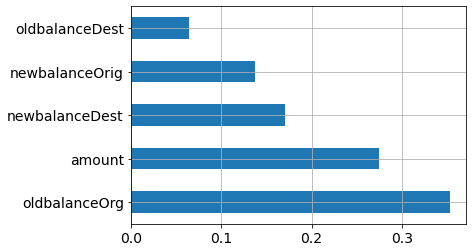

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

# Selecting best features
# Using K best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 3 best features

# Using Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [34]:
columns_req=data.iloc[:,:-1].columns
print(columns_req)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = columns_req
vif_data["VIF"] = [variance_inflation_factor(data.iloc[:,:-1].values, i)
                          for i in range(len(columns_req))]
  
print(vif_data)

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')
          feature         VIF
0          amount    3.861494
1   oldbalanceOrg  483.509596
2  newbalanceOrig  484.934400
3  oldbalanceDest   70.532687
4  newbalanceDest   82.258710


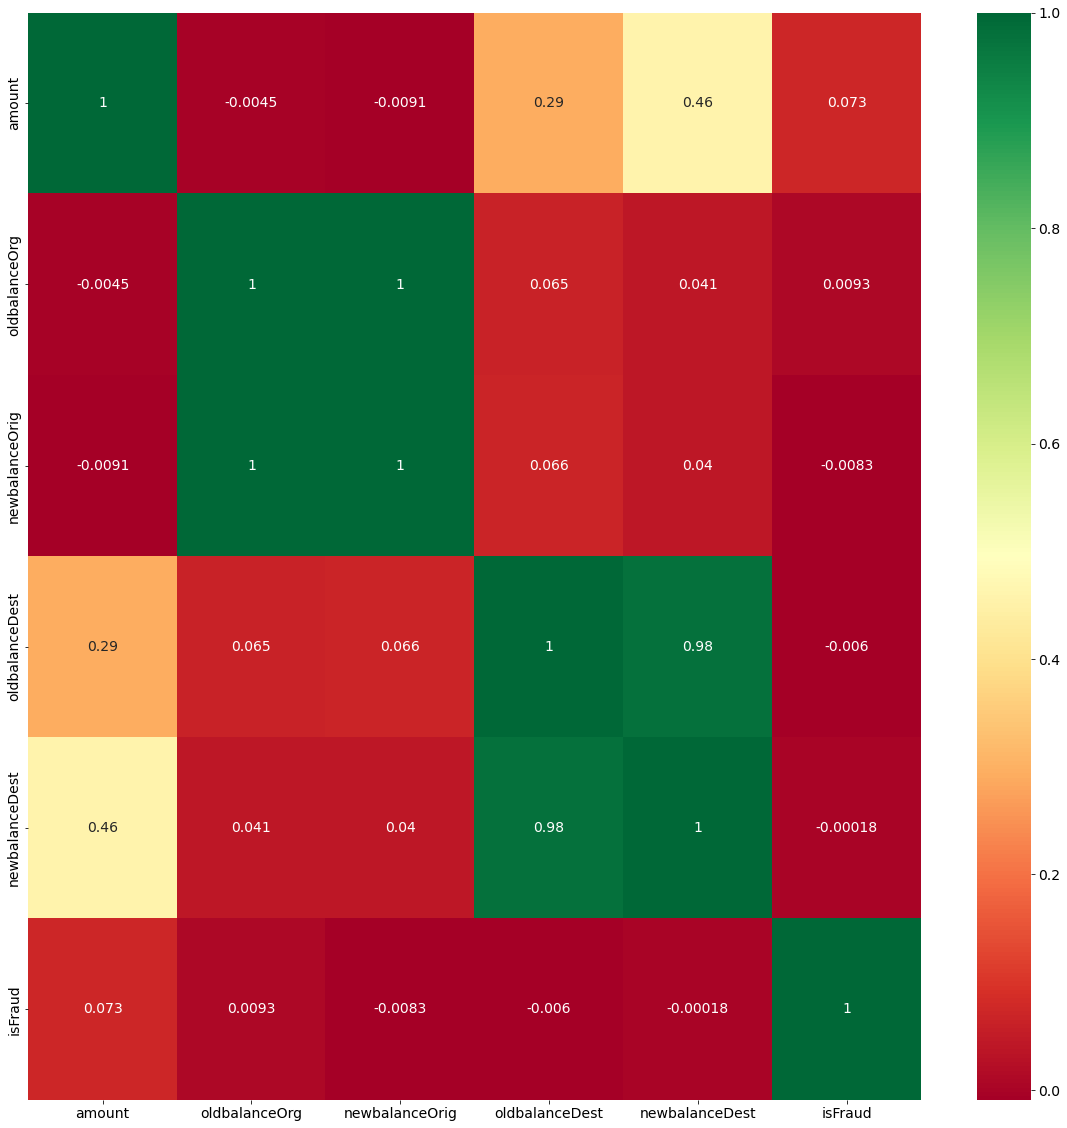

In [ ]:
# Correlation matrix with heatmap
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# from the heatmap we can see that amount and oldbalanceOrg are very much related with Fraud cases

In [ ]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yout = lof.fit_predict(X_train)
mask = yout != -1
X_train, y_train = X_train[mask, :], y_train[mask]


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# applying pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Training Decision Tree
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))
confusion_matrix(y_test, dt_yhat, labels = [0, 1])




Accuracy score of the Decision Tree model is 0.9989959679092828
F1 score of the Decision Tree model is 0.38932038834951455


array([[1251289,      38],
       [   1220,     401]])

In [ ]:
# Training KNN
n = 3
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9991140893317201
F1 score of the K-Nearest Neighbors model is 0.5937042459736457


In [ ]:
# Training Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9987070492949428
F1 score of the Logistic Regression model is 0.09799554565701558


In [ ]:
# Training Random Forest

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9987270022379221
F1 score of the Random Forest model is 0.031572556162720096


In [ ]:
# Training XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

[04:51:10] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Accuracy score of the XGBoost model is 0.9991100987431242
F1 score of the XGBoost model is 0.49063499314755593


In [ ]:
# Conclusion

## Answering Questions:-

# 1. Data cleaning is done by dropping the outliers, non-numerical columns and multicollinearity is checked by VIF analysis. BY VIF analysis, features with higher value are linearly related and hence the related column is dropped

# 2. The fraud detection model uses the best features determined by K best features, Extra Tree Classifier which gives us the order of importance of features. 
#    After cleaning the data and using the features after applying pca, we train different classification models on our dataset after splitting it. 
#    The model which gives the best accuracy and f1 score is selected and any new example is trained on it. The model then outputs whether the given example is fraudulent or not

# 3. The variables are selected using Kbest Features, ExtraTreesClassifier which is plotted using matplotlib to get the feature scores. Further, multi collinearity analysis is done using 
#    VIF which gives us the correlated feature. Finally PCA is applied to the features which gives us the important features for the dataset.in

# 4. The performance of the model is determined by training different classification models and computing their accuracy and f1 scores. Of all the models, KNN gives us the best np.result_type

# 5. The key factors that predict the fraudulent customer are the amount of transaction, original old balance of customer and the new balance of the recipient after transaction

# 6. Yes these factors make sense as the amount of transaction is greater when a fraud is conducted which is confirmed by the change in new balance after transaction and old balance 
#    before transaction. For a normal transaction to occur, there is a less probability of huge variation in the data stated for above factors.

# 7. If the company has public website, then careful management of the website should be done against potential web scrapers. The company can often recognise a scraping attempt by a 
#     high number of requests sent to the website from a single IP address. Then that suspicious IP address can be excluded. The company should also increase it security to protect 
#     against potential breaches. Company can also use  reinforcement learning through machine learning algorithms which can continuously take feedback from humans and learn to become 
#     increasingly accurate with time.

# 8. If the steps are implemented, then there will be much less positive class in our datset(the fraudulent transactions are positive class) and hence the data will be more skewed 
#    over a large amount of time period which can be seen by more no. of values labeled 0 in the 'isFraud' column as the value increase in 'step' column. 
